# Assignment 03

Due Sep 20, 11:59pm. Please submit one .ipynb file to Beachboard. 

<p style='text-align: right; '> Hansell Perez </p>
<p style='text-align: right; '> 9/20/2022 </p>

Please refer to the Lec03_NMF_SVD.ipynb, as well as the tutorial in this website: [https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py). 

Then do the following:

* Load the Faces dataset of human faces, form the data matrix called faces.  
* Find out how many human images are there. 
* Plot the first 4 human images in one row.
* Notice that we have implemented our own randomized SVD in class. 
* Please use our own implementation of randomized SVD to decompose the faces matrix, with 8 truncated components. 
* Plot the 8 eigenfaces in 2 rows and 4 columns. 
* Reconstruct the first 4 images using the 8 eigenfaces, and plot the reconstructed imagesc in one row. 

#### 1. Load the Faces dataset of human faces, form the matrix called faces

In [69]:
import logging

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition

rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
print(faces)

[[0.6694215  0.6363636  0.6487603  ... 0.08677686 0.08264463 0.07438017]
 [0.76859504 0.75619835 0.74380165 ... 0.48347107 0.6280992  0.6528926 ]
 [0.37190083 0.34710744 0.3677686  ... 0.7066116  0.6818182  0.5495868 ]
 ...
 [0.55785125 0.60330576 0.6570248  ... 0.17768595 0.20661157 0.19421488]
 [0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.3966942  0.3677686  0.3429752  ... 0.37190083 0.26859504 0.29752067]]


#### 2. Find out how many human images are there.

In [70]:
n_samples = faces.shape[0]
print("There are %d human images in the set" % n_samples)

There are 400 human images in the set


#### 3. Plot the first 4 human images in one row.

In [73]:
n_row, n_col = 1, 4
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

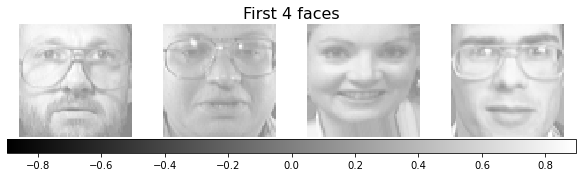

In [89]:
plot_gallery("First 4 faces", faces)

#### 4. Notice that we have implemented our own randomized SVD in class. Please use our own implementation of randomized SVD to decompose the faces matrix, with 8 truncated components.

In [21]:
from scipy import linalg
import numpy as np

In [22]:
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [23]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [66]:
u, s, v = randomized_svd(faces, 8)
print(u.shape, s.shape, v.shape)

(400, 8) (8,) (8, 4096)


#### 5. Plot the 8 eigenfaces in 2 rows and 4 columns.

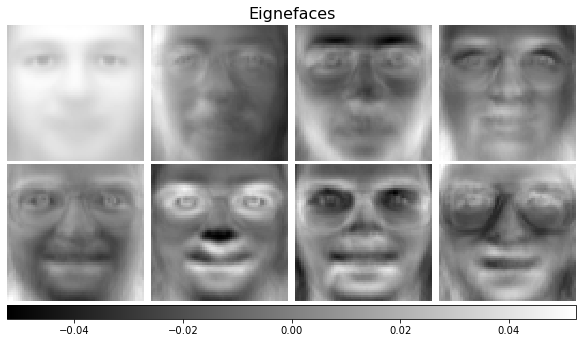

In [91]:
plot_gallery("Eignefaces", v, 4, 2)

#### 6. Reconstruct the first 4 images using the 8 eigenfaces, and plot the reconstructed images in one row.

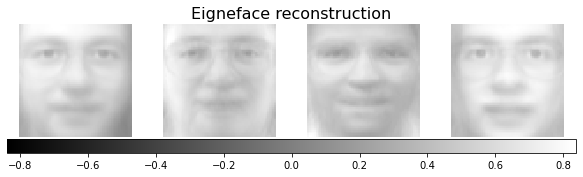

In [92]:
faces_decomp = (u @ np.diag(s) @ v)
plot_gallery("Eigneface reconstruction", faces_decomp, 4)